# 1. Dates and Calendars

## Dates in Python
### Which day of the week?


In [1]:
# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


> In the United States, Canada, and Japan, Sunday is often considered the first day of the week. Everywhere else, it usually begins on Monday.

### How many hurricanes come early?


In [2]:
import pickle
# load : get the data from file
florida_hurricane_dates = pickle.load(open('florida_hurricane_dates.pkl', "rb"))

#### How many hurricanes since 1950 have made landfall in Florida before the official start of hurricane season?

In [3]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

10


## Math with dates
### Subtracting dates



In [4]:
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007,5,9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


### Counting events per calendar month


In [5]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
  
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


### Putting a list of dates in order


In [6]:
# load : get the data from file
dates_scrambled = pickle.load(open('test.pkl', "rb"))

In [7]:
# Print the first and last scrambled dates
print(dates_scrambled[0])
print(dates_scrambled[-1])

# Put the dates in order
dates_ordered = sorted(dates_scrambled)

# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])

1988-08-04
2011-07-18
1950-08-31
2017-10-29


## Turning dates into strings
### Printing dates in a friendly format


In [8]:
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


### Representing dates in different ways


In [9]:
# Import date
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))

1992-08


In [10]:
# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime('%B (%Y)'))

August (1992)


In [11]:
# Print the date in the format 'YYYY-DDD'
print(andrew.strftime('%Y-%j')) # j is the day of the yea

1992-239


# 2. Combining Dates and Times
## Dates and times
### Creating datetimes by hand



In [12]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-10-01T15:26:26


In [13]:
# Create a datetime object
dt = datetime(2017,12,31,15,19,13)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-12-31T15:19:13


In [14]:
# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-12-31 15:19:13


### Counting events before and after noon


In [15]:
import pandas as pd

onebike = pd.read_csv('capital-onebike.csv')

In [16]:
onebike.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [17]:
onebike_datetimes = onebike[['Start date','End date']]
onebike_datetimes = onebike_datetimes.copy()
onebike_datetimes['Start date'] = pd.to_datetime(onebike_datetimes['Start date'])
onebike_datetimes['Start'] = onebike_datetimes['Start date'].dt.hour
onebike_datetimes.head()

,Start date,End date,Start
0,2017-10-01 15:23:25,2017-10-01 15:26:26,15
1,2017-10-01 15:42:57,2017-10-01 17:49:59,15
2,2017-10-02 06:37:10,2017-10-02 06:42:53,6
3,2017-10-02 08:56:45,2017-10-02 09:18:03,8
4,2017-10-02 18:23:48,2017-10-02 18:45:05,18


In [18]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes['Start']:
  # Check to see if the trip starts before noon
  if trip < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 94, 'PM': 196}


## Printing and parsing datetimes
### Turning strings into datetimes



In [19]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


### Parsing pairs of strings as datetimes


In [20]:
onebike_datetime_strings = [('2017-10-01 15:23:25', '2017-10-01 15:26:26'),
 ('2017-10-01 15:42:57', '2017-10-01 17:49:59'),
 ('2017-10-02 06:37:10', '2017-10-02 06:42:53'),
 ('2017-10-02 08:56:45', '2017-10-02 09:18:03'),
 ('2017-10-02 18:23:48', '2017-10-02 18:45:05'),
 ('2017-10-02 18:48:08', '2017-10-02 19:10:54'),
 ('2017-10-02 19:18:10', '2017-10-02 19:31:45'),
 ('2017-10-02 19:37:32', '2017-10-02 19:46:37'),
 ('2017-10-03 08:24:16', '2017-10-03 08:32:27'),
 ('2017-10-03 18:17:07', '2017-10-03 18:27:46'),
 ('2017-10-03 19:24:10', '2017-10-03 19:52:08'),
 ('2017-10-03 20:17:06', '2017-10-03 20:23:52'),
 ('2017-10-03 20:45:21', '2017-10-03 20:57:10'),
 ('2017-10-04 07:04:57', '2017-10-04 07:13:31'),
 ('2017-10-04 07:13:42', '2017-10-04 07:21:54'),
 ('2017-10-04 14:22:12', '2017-10-04 14:50:00'),
 ('2017-10-04 15:07:27', '2017-10-04 15:44:49'),
 ('2017-10-04 15:46:41', '2017-10-04 16:32:33'),
 ('2017-10-04 16:34:44', '2017-10-04 16:46:59'),
 ('2017-10-04 17:26:06', '2017-10-04 17:31:36'),
 ('2017-10-04 17:42:03', '2017-10-04 17:50:41'),
 ('2017-10-05 07:49:02', '2017-10-05 08:12:55'),
 ('2017-10-05 08:26:21', '2017-10-05 08:29:45'),
 ('2017-10-05 08:33:27', '2017-10-05 08:38:31'),
 ('2017-10-05 16:35:35', '2017-10-05 16:51:52'),
 ('2017-10-05 17:53:31', '2017-10-05 18:16:50'),
 ('2017-10-06 08:17:17', '2017-10-06 08:38:01'),
 ('2017-10-06 11:39:40', '2017-10-06 11:50:38'),
 ('2017-10-06 12:59:54', '2017-10-06 13:13:14'),
 ('2017-10-06 13:43:05', '2017-10-06 14:14:56'),
 ('2017-10-06 14:28:15', '2017-10-06 15:09:26'),
 ('2017-10-06 15:50:10', '2017-10-06 16:12:34'),
 ('2017-10-06 16:32:16', '2017-10-06 16:39:31'),
 ('2017-10-06 16:44:08', '2017-10-06 16:48:39'),
 ('2017-10-06 16:53:43', '2017-10-06 17:09:03'),
 ('2017-10-07 11:38:55', '2017-10-07 11:53:06'),
 ('2017-10-07 14:03:36', '2017-10-07 14:07:05'),
 ('2017-10-07 14:20:03', '2017-10-07 14:27:36'),
 ('2017-10-07 14:30:50', '2017-10-07 14:44:51'),
 ('2017-10-08 00:28:26', '2017-10-08 00:30:48'),
 ('2017-10-08 11:16:21', '2017-10-08 11:33:24'),
 ('2017-10-08 12:37:03', '2017-10-08 13:01:29'),
 ('2017-10-08 13:30:37', '2017-10-08 13:57:53'),
 ('2017-10-08 14:16:40', '2017-10-08 15:07:19'),
 ('2017-10-08 15:23:50', '2017-10-08 15:50:01'),
 ('2017-10-08 15:54:12', '2017-10-08 16:17:42'),
 ('2017-10-08 16:28:52', '2017-10-08 16:35:18'),
 ('2017-10-08 23:08:14', '2017-10-08 23:33:41'),
 ('2017-10-08 23:34:49', '2017-10-08 23:45:11'),
 ('2017-10-08 23:46:47', '2017-10-09 00:10:57'),
 ('2017-10-09 00:12:58', '2017-10-09 00:36:40'),
 ('2017-10-09 00:37:02', '2017-10-09 00:53:33'),
 ('2017-10-09 01:23:29', '2017-10-09 01:48:13'),
 ('2017-10-09 01:49:25', '2017-10-09 02:13:35'),
 ('2017-10-09 02:14:11', '2017-10-09 02:29:40'),
 ('2017-10-09 13:04:32', '2017-10-09 13:13:25'),
 ('2017-10-09 14:30:10', '2017-10-09 14:38:55'),
 ('2017-10-09 15:06:47', '2017-10-09 15:11:30'),
 ('2017-10-09 16:43:25', '2017-10-09 16:45:38'),
 ('2017-10-10 15:32:58', '2017-10-10 15:51:24'),
 ('2017-10-10 16:47:55', '2017-10-10 17:03:47'),
 ('2017-10-10 17:51:05', '2017-10-10 18:00:18'),
 ('2017-10-10 18:08:12', '2017-10-10 18:19:11'),
 ('2017-10-10 19:09:35', '2017-10-10 19:14:32'),
 ('2017-10-10 19:17:11', '2017-10-10 19:23:08'),
 ('2017-10-10 19:28:11', '2017-10-10 19:44:40'),
 ('2017-10-10 19:55:35', '2017-10-10 20:11:54'),
 ('2017-10-10 22:20:43', '2017-10-10 22:33:23'),
 ('2017-10-11 04:40:52', '2017-10-11 04:59:22'),
 ('2017-10-11 06:28:58', '2017-10-11 06:40:13'),
 ('2017-10-11 16:41:07', '2017-10-11 17:01:14'),
 ('2017-10-12 08:08:30', '2017-10-12 08:35:03'),
 ('2017-10-12 08:47:02', '2017-10-12 08:59:50'),
 ('2017-10-12 13:13:39', '2017-10-12 13:37:45'),
 ('2017-10-12 13:40:12', '2017-10-12 13:48:17'),
 ('2017-10-12 13:49:56', '2017-10-12 13:53:16'),
 ('2017-10-12 14:33:18', '2017-10-12 14:39:57'),
 ('2017-10-13 15:55:39', '2017-10-13 15:59:41'),
 ('2017-10-17 17:58:48', '2017-10-17 18:01:38'),
 ('2017-10-19 20:21:45', '2017-10-19 20:29:15'),
 ('2017-10-19 21:11:39', '2017-10-19 21:29:37'),
 ('2017-10-19 21:30:01', '2017-10-19 21:47:23'),
 ('2017-10-19 21:47:34', '2017-10-19 21:57:07'),
 ('2017-10-19 21:57:24', '2017-10-19 22:09:52'),
 ('2017-10-21 12:24:09', '2017-10-21 12:36:24'),
 ('2017-10-21 12:36:37', '2017-10-21 12:42:13'),
 ('2017-10-21 13:47:43', '2017-10-22 11:09:36'),
 ('2017-10-22 13:28:53', '2017-10-22 13:31:44'),
 ('2017-10-22 13:47:05', '2017-10-22 13:56:33'),
 ('2017-10-22 14:26:41', '2017-10-22 14:32:39'),
 ('2017-10-22 14:54:41', '2017-10-22 15:09:58'),
 ('2017-10-22 16:40:29', '2017-10-22 16:51:40'),
 ('2017-10-22 17:58:46', '2017-10-22 18:28:37'),
 ('2017-10-22 18:45:16', '2017-10-22 18:50:34'),
 ('2017-10-22 18:56:22', '2017-10-22 19:11:10'),
 ('2017-10-23 10:14:08', '2017-10-23 10:35:32'),
 ('2017-10-23 11:29:36', '2017-10-23 14:38:34'),
 ('2017-10-23 15:04:52', '2017-10-23 15:32:58'),
 ('2017-10-23 15:33:48', '2017-10-23 17:06:47'),
 ('2017-10-23 17:13:16', '2017-10-23 19:31:26'),
 ('2017-10-23 19:55:03', '2017-10-23 20:25:53'),
 ('2017-10-23 21:47:54', '2017-10-23 22:18:04'),
 ('2017-10-23 22:34:12', '2017-10-23 22:48:42'),
 ('2017-10-24 06:55:01', '2017-10-24 07:02:17'),
 ('2017-10-24 14:56:07', '2017-10-24 15:03:16'),
 ('2017-10-24 15:51:36', '2017-10-24 15:59:50'),
 ('2017-10-24 16:31:10', '2017-10-24 16:55:09'),
 ('2017-10-28 14:26:14', '2017-10-28 14:32:34'),
 ('2017-11-01 09:41:54', '2017-11-01 09:52:23'),
 ('2017-11-01 20:16:11', '2017-11-01 20:32:13'),
 ('2017-11-02 19:44:29', '2017-11-02 19:50:56'),
 ('2017-11-02 20:14:37', '2017-11-02 20:30:29'),
 ('2017-11-02 21:35:47', '2017-11-02 21:38:57'),
 ('2017-11-03 09:59:27', '2017-11-03 10:11:46'),
 ('2017-11-03 10:13:22', '2017-11-03 10:32:02'),
 ('2017-11-03 10:44:25', '2017-11-03 10:50:34'),
 ('2017-11-03 16:06:43', '2017-11-03 16:44:38'),
 ('2017-11-03 16:45:54', '2017-11-03 17:00:27'),
 ('2017-11-03 17:07:15', '2017-11-03 17:35:05'),
 ('2017-11-03 17:36:05', '2017-11-03 17:46:48'),
 ('2017-11-03 17:50:31', '2017-11-03 18:00:03'),
 ('2017-11-03 19:22:56', '2017-11-03 19:45:51'),
 ('2017-11-04 13:14:10', '2017-11-04 13:26:15'),
 ('2017-11-04 14:18:37', '2017-11-04 14:30:05'),
 ('2017-11-04 14:45:59', '2017-11-04 15:03:20'),
 ('2017-11-04 15:16:03', '2017-11-04 15:44:30'),
 ('2017-11-04 16:37:46', '2017-11-04 16:58:22'),
 ('2017-11-04 17:13:19', '2017-11-04 17:34:50'),
 ('2017-11-04 18:10:34', '2017-11-04 18:58:44'),
 ('2017-11-05 01:56:50', '2017-11-05 01:01:04'),
 ('2017-11-05 08:33:33', '2017-11-05 08:53:46'),
 ('2017-11-05 08:58:08', '2017-11-05 09:03:39'),
 ('2017-11-05 11:05:08', '2017-11-05 11:30:05'),
 ('2017-11-06 08:50:18', '2017-11-06 08:59:05'),
 ('2017-11-06 09:04:03', '2017-11-06 09:13:47'),
 ('2017-11-06 16:19:36', '2017-11-06 17:02:55'),
 ('2017-11-06 17:21:27', '2017-11-06 17:34:06'),
 ('2017-11-06 17:36:01', '2017-11-06 17:57:32'),
 ('2017-11-06 17:59:52', '2017-11-06 18:15:08'),
 ('2017-11-06 18:18:36', '2017-11-06 18:21:17'),
 ('2017-11-06 19:24:31', '2017-11-06 19:37:57'),
 ('2017-11-06 19:49:16', '2017-11-06 20:03:14'),
 ('2017-11-07 07:50:48', '2017-11-07 08:01:32'),
 ('2017-11-08 13:11:51', '2017-11-08 13:18:05'),
 ('2017-11-08 21:34:47', '2017-11-08 21:46:05'),
 ('2017-11-08 22:02:30', '2017-11-08 22:04:47'),
 ('2017-11-09 07:01:11', '2017-11-09 07:12:10'),
 ('2017-11-09 08:02:02', '2017-11-09 08:08:28'),
 ('2017-11-09 08:19:59', '2017-11-09 08:32:24'),
 ('2017-11-09 08:41:31', '2017-11-09 08:48:59'),
 ('2017-11-09 09:00:06', '2017-11-09 09:09:24'),
 ('2017-11-09 09:09:37', '2017-11-09 09:24:25'),
 ('2017-11-09 13:14:37', '2017-11-09 13:25:39'),
 ('2017-11-09 15:20:07', '2017-11-09 15:31:10'),
 ('2017-11-09 18:47:08', '2017-11-09 18:53:10'),
 ('2017-11-09 23:35:02', '2017-11-09 23:43:35'),
 ('2017-11-10 07:51:33', '2017-11-10 08:02:28'),
 ('2017-11-10 08:38:28', '2017-11-10 08:42:09'),
 ('2017-11-11 18:05:25', '2017-11-11 18:13:14'),
 ('2017-11-11 19:39:12', '2017-11-11 19:46:22'),
 ('2017-11-11 21:13:19', '2017-11-11 21:16:31'),
 ('2017-11-12 09:46:19', '2017-11-12 09:51:43'),
 ('2017-11-13 13:33:42', '2017-11-13 13:54:15'),
 ('2017-11-14 08:40:29', '2017-11-14 08:55:52'),
 ('2017-11-15 06:14:05', '2017-11-15 06:30:06'),
 ('2017-11-15 08:14:59', '2017-11-15 08:23:44'),
 ('2017-11-15 10:16:44', '2017-11-15 10:33:41'),
 ('2017-11-15 10:33:58', '2017-11-15 10:54:14'),
 ('2017-11-15 11:02:15', '2017-11-15 11:14:42'),
 ('2017-11-16 09:27:41', '2017-11-16 09:38:49'),
 ('2017-11-16 09:57:41', '2017-11-16 10:18:00'),
 ('2017-11-16 17:25:05', '2017-11-16 17:44:47'),
 ('2017-11-17 13:45:54', '2017-11-17 16:36:56'),
 ('2017-11-17 19:12:49', '2017-11-17 19:31:15'),
 ('2017-11-18 10:49:06', '2017-11-18 10:55:45'),
 ('2017-11-18 11:32:12', '2017-11-18 11:44:16'),
 ('2017-11-18 18:09:01', '2017-11-18 18:14:31'),
 ('2017-11-18 18:53:10', '2017-11-18 19:01:29'),
 ('2017-11-19 14:15:41', '2017-11-19 14:31:49'),
 ('2017-11-20 21:19:19', '2017-11-20 21:41:09'),
 ('2017-11-20 22:39:48', '2017-11-20 23:23:37'),
 ('2017-11-21 17:44:25', '2017-11-21 17:51:32'),
 ('2017-11-21 18:20:52', '2017-11-21 18:34:51'),
 ('2017-11-21 18:47:32', '2017-11-21 18:51:50'),
 ('2017-11-21 19:07:57', '2017-11-21 19:14:33'),
 ('2017-11-21 20:04:56', '2017-11-21 20:08:54'),
 ('2017-11-21 21:55:47', '2017-11-21 22:08:12'),
 ('2017-11-23 23:47:43', '2017-11-23 23:57:56'),
 ('2017-11-24 06:41:25', '2017-11-24 06:53:15'),
 ('2017-11-24 06:58:56', '2017-11-24 07:33:24'),
 ('2017-11-26 12:25:49', '2017-11-26 12:41:36'),
 ('2017-11-27 05:29:04', '2017-11-27 05:54:13'),
 ('2017-11-27 06:06:47', '2017-11-27 06:11:01'),
 ('2017-11-27 06:45:14', '2017-11-27 06:55:39'),
 ('2017-11-27 09:39:44', '2017-11-27 09:47:43'),
 ('2017-11-27 11:09:18', '2017-11-27 11:20:46'),
 ('2017-11-27 11:31:46', '2017-11-27 11:35:44'),
 ('2017-11-27 12:07:14', '2017-11-27 12:12:36'),
 ('2017-11-27 12:21:40', '2017-11-27 12:26:44'),
 ('2017-11-27 17:26:31', '2017-11-27 17:36:07'),
 ('2017-11-27 18:11:49', '2017-11-27 18:29:04'),
 ('2017-11-27 19:36:16', '2017-11-27 19:47:17'),
 ('2017-11-27 20:12:57', '2017-11-27 20:17:33'),
 ('2017-11-28 08:18:06', '2017-11-28 08:41:53'),
 ('2017-11-28 19:17:23', '2017-11-28 19:34:01'),
 ('2017-11-28 19:34:15', '2017-11-28 19:46:24'),
 ('2017-11-28 21:27:29', '2017-11-28 21:39:32'),
 ('2017-11-29 07:47:38', '2017-11-29 07:51:18'),
 ('2017-11-29 09:50:12', '2017-11-29 09:53:44'),
 ('2017-11-29 17:03:42', '2017-11-29 17:16:21'),
 ('2017-11-29 18:19:15', '2017-11-29 18:23:43'),
 ('2017-12-01 17:03:58', '2017-12-01 17:10:12'),
 ('2017-12-02 07:55:56', '2017-12-02 08:01:01'),
 ('2017-12-02 09:16:14', '2017-12-02 09:21:18'),
 ('2017-12-02 19:48:29', '2017-12-02 19:53:18'),
 ('2017-12-03 14:36:29', '2017-12-03 15:20:09'),
 ('2017-12-03 16:04:02', '2017-12-03 16:25:30'),
 ('2017-12-03 16:40:26', '2017-12-03 16:43:58'),
 ('2017-12-03 17:20:17', '2017-12-03 18:04:33'),
 ('2017-12-04 08:34:24', '2017-12-04 08:51:00'),
 ('2017-12-04 17:49:26', '2017-12-04 17:53:57'),
 ('2017-12-04 18:38:52', '2017-12-04 18:50:33'),
 ('2017-12-04 21:39:20', '2017-12-04 21:46:58'),
 ('2017-12-04 21:54:21', '2017-12-04 21:56:17'),
 ('2017-12-05 08:50:50', '2017-12-05 08:52:54'),
 ('2017-12-06 08:19:38', '2017-12-06 08:24:14'),
 ('2017-12-06 18:19:19', '2017-12-06 18:28:11'),
 ('2017-12-06 18:28:55', '2017-12-06 18:33:12'),
 ('2017-12-06 20:03:29', '2017-12-06 20:21:38'),
 ('2017-12-06 20:36:42', '2017-12-06 20:39:57'),
 ('2017-12-07 05:54:51', '2017-12-07 06:01:15'),
 ('2017-12-08 16:47:18', '2017-12-08 16:55:49'),
 ('2017-12-08 19:15:02', '2017-12-08 19:29:12'),
 ('2017-12-09 22:39:37', '2017-12-09 22:47:19'),
 ('2017-12-09 23:00:10', '2017-12-09 23:05:32'),
 ('2017-12-10 00:39:24', '2017-12-10 00:56:02'),
 ('2017-12-10 01:02:42', '2017-12-10 01:08:09'),
 ('2017-12-10 01:08:57', '2017-12-10 01:11:30'),
 ('2017-12-10 13:49:09', '2017-12-10 13:51:41'),
 ('2017-12-10 15:14:29', '2017-12-10 15:18:19'),
 ('2017-12-10 15:31:07', '2017-12-10 15:36:28'),
 ('2017-12-10 16:20:06', '2017-12-10 16:30:31'),
 ('2017-12-10 17:07:54', '2017-12-10 17:14:25'),
 ('2017-12-10 17:23:47', '2017-12-10 17:45:25'),
 ('2017-12-11 06:17:06', '2017-12-11 06:34:04'),
 ('2017-12-11 09:08:41', '2017-12-11 09:12:21'),
 ('2017-12-11 09:15:41', '2017-12-11 09:20:18'),
 ('2017-12-12 08:55:53', '2017-12-12 08:59:34'),
 ('2017-12-13 17:14:56', '2017-12-13 17:18:32'),
 ('2017-12-13 18:52:16', '2017-12-13 19:00:45'),
 ('2017-12-14 09:01:10', '2017-12-14 09:11:06'),
 ('2017-12-14 09:12:59', '2017-12-14 09:19:06'),
 ('2017-12-14 11:54:33', '2017-12-14 12:02:00'),
 ('2017-12-14 14:40:23', '2017-12-14 14:44:40'),
 ('2017-12-14 15:08:55', '2017-12-14 15:26:24'),
 ('2017-12-14 17:46:17', '2017-12-14 18:09:04'),
 ('2017-12-15 09:08:12', '2017-12-15 09:23:45'),
 ('2017-12-16 09:33:46', '2017-12-16 09:36:17'),
 ('2017-12-16 11:02:31', '2017-12-16 11:05:04'),
 ('2017-12-17 10:09:47', '2017-12-17 10:32:03'),
 ('2017-12-18 08:02:36', '2017-12-18 08:07:34'),
 ('2017-12-18 16:03:00', '2017-12-18 16:09:20'),
 ('2017-12-18 16:30:07', '2017-12-18 16:53:12'),
 ('2017-12-18 19:18:23', '2017-12-18 19:22:08'),
 ('2017-12-18 20:14:46', '2017-12-18 20:17:47'),
 ('2017-12-19 19:14:08', '2017-12-19 19:23:49'),
 ('2017-12-19 19:39:36', '2017-12-19 19:43:46'),
 ('2017-12-20 08:05:14', '2017-12-20 08:10:46'),
 ('2017-12-20 08:15:45', '2017-12-20 08:29:50'),
 ('2017-12-20 08:33:32', '2017-12-20 08:38:09'),
 ('2017-12-20 13:43:36', '2017-12-20 13:54:39'),
 ('2017-12-20 18:57:53', '2017-12-20 19:06:54'),
 ('2017-12-21 07:21:11', '2017-12-21 07:32:03'),
 ('2017-12-21 08:01:58', '2017-12-21 08:06:15'),
 ('2017-12-21 13:20:54', '2017-12-21 13:33:49'),
 ('2017-12-21 15:26:08', '2017-12-21 15:34:27'),
 ('2017-12-21 18:09:46', '2017-12-21 18:38:50'),
 ('2017-12-22 16:14:21', '2017-12-22 16:21:46'),
 ('2017-12-22 16:29:17', '2017-12-22 16:34:14'),
 ('2017-12-25 12:49:51', '2017-12-25 13:18:27'),
 ('2017-12-25 13:46:44', '2017-12-25 14:20:50'),
 ('2017-12-26 10:40:16', '2017-12-26 10:53:45'),
 ('2017-12-27 16:56:12', '2017-12-27 17:17:39'),
 ('2017-12-29 06:02:34', '2017-12-29 06:12:30'),
 ('2017-12-29 12:21:03', '2017-12-29 12:46:16'),
 ('2017-12-29 14:32:55', '2017-12-29 14:43:46'),
 ('2017-12-29 15:08:26', '2017-12-29 15:18:51'),
 ('2017-12-29 20:33:34', '2017-12-29 20:38:13'),
 ('2017-12-30 13:51:03', '2017-12-30 13:54:33'),
 ('2017-12-30 15:09:03', '2017-12-30 15:19:13')]

In [21]:
# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)
print(onebike_datetimes[0:10])

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26)}, {'start': datetime.datetime(2017, 10, 1, 15, 42, 57), 'end': datetime.datetime(2017, 10, 1, 17, 49, 59)}, {'start': datetime.datetime(2017, 10, 2, 6, 37, 10), 'end': datetime.datetime(2017, 10, 2, 6, 42, 53)}, {'start': datetime.datetime(2017, 10, 2, 8, 56, 45), 'end': datetime.datetime(2017, 10, 2, 9, 18, 3)}, {'start': datetime.datetime(2017, 10, 2, 18, 23, 48), 'end': datetime.datetime(2017, 10, 2, 18, 45, 5)}, {'start': datetime.datetime(2017, 10, 2, 18, 48, 8), 'end': datetime.datetime(2017, 10, 2, 19, 10, 54)}, {'start': datetime.datetime(2017, 10, 2, 19, 18, 10), 'end': datetime.datetime(2017, 10, 2, 19, 31, 45)}, {'start': datetime.datetime(2017, 10, 2, 19, 37, 32), 'end': datetime.datetime(2017, 10, 2, 19, 46, 37)}, {'start': datetime.datetime(2017, 10, 3, 8, 24, 16), 'end': datetime.datetime(2017, 10, 3, 8, 32, 27)}, {'start': datetime.datetime(2017, 10, 3, 18, 17, 7), '

### Recreating ISO format with strftime()


In [22]:
# Import datetime
from datetime import datetime

# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


### Unix timestamps


In [23]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 16, 19, 13), datetime.datetime(2017, 12, 30, 16, 9, 3)]


## Working with durations
### Turning pairs of datetimes into durations



In [24]:
# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)

In [25]:
print(onebike_durations[0:10])

[181.0, 7622.0, 343.0, 1278.0, 1277.0, 1366.0, 815.0, 545.0, 491.0, 639.0]


### Average trip time


In [26]:
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

1178.9310344827586


### The long and the short of why time is hard


In [27]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


# 3. Time Zones and Daylight Saving
## UTC offsets
### Creating timezone aware datetimes


In [28]:
# Import datetime, timezone
from datetime import datetime, timezone

# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00


In [29]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [30]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+11:00


### Setting timezones


In [31]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)

In [32]:
print(onebike_datetimes[:10])

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))}, {'start': datetime.datetime(2017, 10, 1, 15, 42, 57, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))), 'end': datetime.datetime(2017, 10, 1, 17, 49, 59, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))}, {'start': datetime.datetime(2017, 10, 2, 6, 37, 10, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))), 'end': datetime.datetime(2017, 10, 2, 6, 42, 53, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))}, {'start': datetime.datetime(2017, 10, 2, 8, 56, 45, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))), 'end': datetime.datetime(2017, 10, 2, 9, 18, 3, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))}, {'start': datetime.d

### What time did the bike leave in UTC?


In [33]:
# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt = trip['start']
  # Move dt to be in UTC
  dt = dt.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


## Time zone database
### Putting the bike trips into the right time zone


In [34]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=et)
  trip['end'] = trip['end'].replace(tzinfo=et)

In [35]:
onebike_datetimes[:5]

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 1, 15, 26, 26, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 1, 15, 42, 57, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 1, 17, 49, 59, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 2, 6, 37, 10, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 2, 6, 42, 53, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 2, 8, 56, 45, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.datetime(2017, 10, 2, 9, 18, 3, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'start': datetime.datetime(2017, 10, 2, 18, 23, 48, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'end': datetime.d

### What time did the bike leave? (Global edition)


In [36]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00


In [37]:
# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in India?
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T00:53:25+05:30


In [38]:
# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


## Starting daylight saving time
### How many hours elapsed around daylight saving?


In [39]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00


In [40]:
# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

6.0


In [41]:
# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

5.0


### March 29, throughout a decade


In [42]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


## Ending daylight saving time
### Finding ambiguous datetimes


In [43]:
# Loop over trips
for trip in onebike_datetimes:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start'].replace(tzinfo=et)):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end
  if tz.datetime_ambiguous(trip['end'].replace(tzinfo=et)):
    print("Ambiguous end at " + str(trip['end']))

Ambiguous start at 2017-11-05 01:56:50
Ambiguous end at 2017-11-05 01:01:04


### Cleaning daylight saving data with fold


In [44]:
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: -3346.0


# 4. Easy and Powerful: Dates and Times in Pandas
## Reading date and time data in Pandas
### Loading a csv file in Pandas



In [45]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ["Start date", "End date"])

# Print the initial (0th) row
rides.iloc[0]

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object

### Making timedelta columns


In [46]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

rides['Duration'].head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

## Summarizing datetime data in Pandas
### How many joyrides?


In [47]:
# Create joyrides
joyrides = (rides["Start station"] == rides["End station"])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### It's getting cold outside, W20529


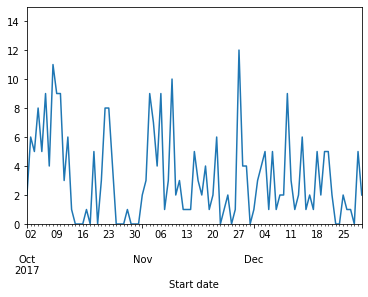

In [48]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample("D", on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

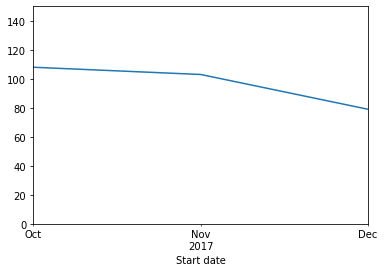

In [49]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.resample("M", on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

### Members vs casual riders over time


In [50]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample("M", on="Start date")['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Combining groupby() and resample()


In [51]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample("M", on="Start date")

# Print the median duration for each group
print(grouped["Duration"].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


## Additional datetime methods in Pandas
### Timezones in Pandas


In [52]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous = "NaT")

# Print first value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


In [53]:
# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 20:23:25+01:00


### How long per weekday?


In [54]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
rides.groupby("Ride start weekday")['Duration'].median()

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64

### How long between rides?


In [61]:
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ["Start date", "End date"])

In [62]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - rides['End date']

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample("M", on = "Start date")

# Print the average hours between rides each month
monthly['Time since'].mean()/(60*60)

Start date
2017-10-31   -0.524015
2017-11-30   -0.237271
2017-12-31   -0.176417
Freq: M, Name: Time since, dtype: float64